In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dt
import plotly.express as px

In [2]:
preped_data = pd.read_csv('preped_data.csv')

In [25]:
preped_data.info()
display(preped_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   state          1000000 non-null  category      
 1   dt             1000000 non-null  datetime64[ns]
 2   temp_C         1000000 non-null  float64       
 3   humid_pct      1000000 non-null  float64       
 4   precip_mm      1000000 non-null  float64       
 5   windspeed_kmh  1000000 non-null  float64       
 6   temp_F         1000000 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 46.7 MB


,state,dt,temp_C,humid_pct,precip_mm,windspeed_kmh,temp_F
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,51.229402
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,47.721452
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,52.938385
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,16.467843
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,103.654783


In [4]:
preped_data = preped_data.drop(['Unnamed: 0'], axis = 1)

#changing into more suitable data types and fixing datetime if needed
#change data types by using a dictionary

preped_data = preped_data.astype({'state': 'category'})
preped_data['dt'] = pd.to_datetime(preped_data['dt'])

In [5]:
preped_data.describe()

,dt,temp_C,humid_pct,precip_mm,windspeed_kmh,temp_F
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2024-03-10 10:40:58.896321792,14.779705,60.021830,5.109639,14.997598,58.603469
min,2024-01-01 00:00:06,-19.969311,30.000009,0.000009,0.000051,-3.944760
25%,2024-02-04 16:28:23.750000128,2.269631,45.008500,2.580694,7.490101,36.085336
50%,2024-03-10 11:43:28,14.778002,60.018708,5.109917,14.993777,58.600404
75%,2024-04-14 03:51:32.500000,27.270489,75.043818,7.613750,22.514110,81.086880
max,2024-05-18 19:44:10,39.999801,89.999977,14.971583,29.999973,103.999641
std,NaN,14.482558,17.324022,2.947997,8.663556,26.068605


In [6]:
preped_data.drop(['state', 'dt'], axis = 1).corr()

,temp_C,humid_pct,precip_mm,windspeed_kmh,temp_F
temp_C,1.000000,-0.001344,-0.010876,-0.001273,1.000000
humid_pct,-0.001344,1.000000,-0.000264,-0.000642,-0.001344
precip_mm,-0.010876,-0.000264,1.000000,0.000981,-0.010876
windspeed_kmh,-0.001273,-0.000642,0.000981,1.000000,-0.001273
temp_F,1.000000,-0.001344,-0.010876,-0.001273,1.000000


In [59]:
def label_function(val):
    return f'{val / 100 * len(preped_data):.0f}\n{val:.0f}%'

def plots(plot_type = '', args = [], bins = 10, color = None, title = '', ts = None):
    
    match plot_type:
        
        case 'pie':
            if len(args) != 1:
                return 'Pie charts only need one variable'
            else:
                preped_data.groupby(args[0]).size().plot(kind = 'pie', autopct = label_function, title = title)
        case 'hist':
            if len(args) != 1:
                return 'Histograms only need one variable'
            else:
                plt.hist(preped_data[args[0]], bins = bins, color = color, title = title)
        case 'density':
            if len(args) != 1:
                return 'Density plots only need one variable'
            else:
                sns.set_style('whitegrid')
                sns.kdeplot(preped_data[args[0]])
        case 'scatter':
            if len(args) != 2:
                return 'Scatter plots only need two variables'
            else:
                plt.scatter(preped_data[args[0]], preped_data[args[1]], title = title)
        case 'ts':
            if len(args) == 0:
                return 'Time series plots can take any number of variables and needs a filtered time series dataframe'
            else:
                plt.plot(ts.index, ts[args])                
        case _:
            return 'The valid plot types are "pie, histogram, density, scatter and time series"'

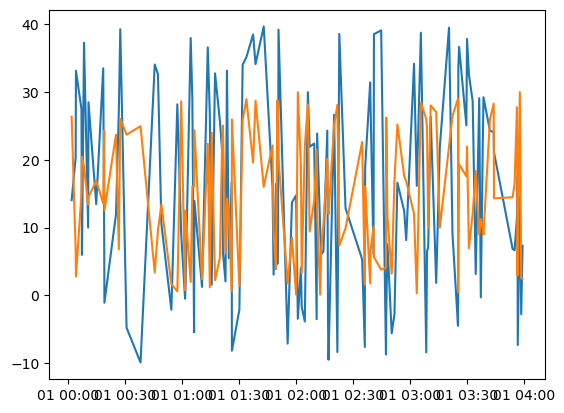

In [69]:
# Using time series plots

ts = preped_data.set_index('dt')
ts = ts.sort_values('dt')
ts = ts.query('state == "Philadelphia" and dt < "2024-01-01 4:00:00"')

plots('ts', ['temp_C', 'windspeed_kmh'], ts = ts)